In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme()


In [2]:
ruta = r'C:\proyecto_EDA_meteoritos\data\meteorite_landings_nasa.csv'
df = pd.read_csv(ruta, encoding='utf-8')

df.head()


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
df.shape


(45716, 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
df.isna().sum()


name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

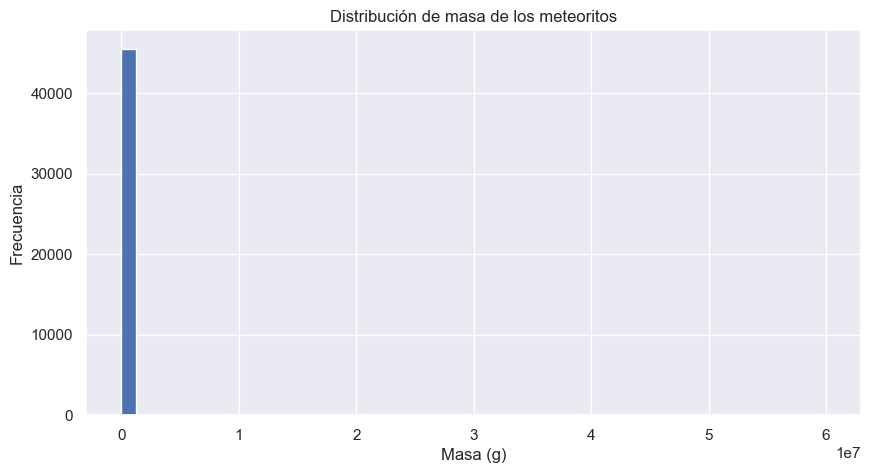

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['mass (g)'], bins=50)
plt.title('Distribución de masa de los meteoritos')
plt.xlabel('Masa (g)')
plt.ylabel('Frecuencia')
plt.show()


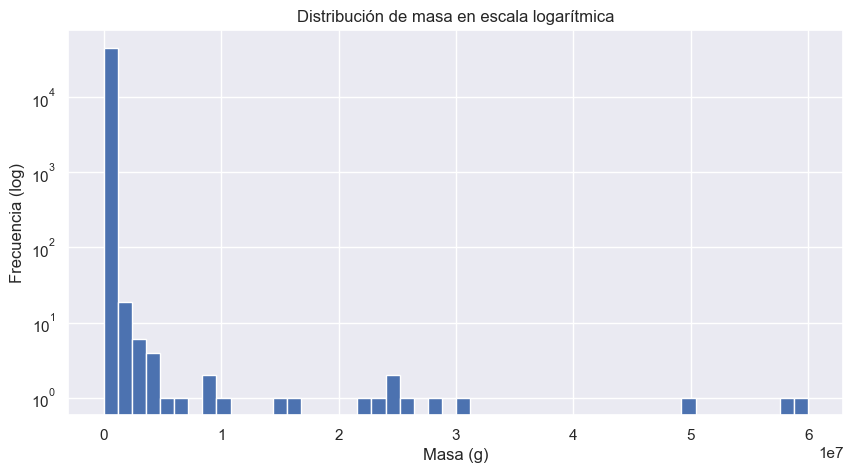

In [8]:
plt.figure(figsize=(10,5))
plt.hist(df['mass (g)'], bins=50, log=True)
plt.title('Distribución de masa en escala logarítmica')
plt.xlabel('Masa (g)')
plt.ylabel('Frecuencia (log)')
plt.show()


In [9]:
df['mass (g)'].describe()


count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass (g), dtype: float64

In [10]:
df['fall'].value_counts()


fall
Found    44609
Fell      1107
Name: count, dtype: int64

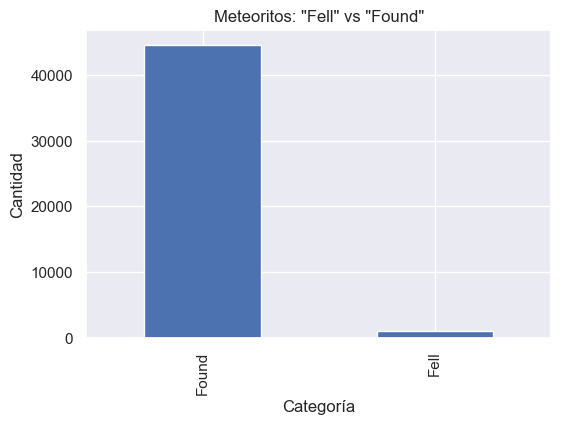

In [11]:
df['fall'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Meteoritos: "Fell" vs "Found"')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()


In [12]:
df['recclass'].nunique()
df['recclass'].value_counts().head(10)


recclass
L6      8285
H5      7142
L5      4796
H6      4528
H4      4211
LL5     2766
LL6     2043
L4      1253
H4/5     428
CM2      416
Name: count, dtype: int64

In [13]:
df['year'].describe()


count    45425.000000
mean      1991.828817
std         25.052766
min        860.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2101.000000
Name: year, dtype: float64

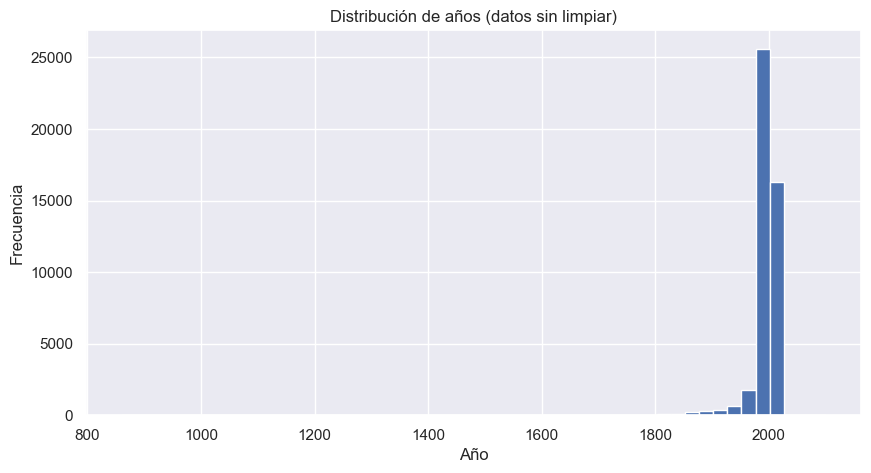

In [14]:
plt.figure(figsize=(10,5))
df['year'].hist(bins=50)
plt.title('Distribución de años (datos sin limpiar)')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


In [15]:
df[['reclat', 'reclong']].describe()


,reclat,reclong
count,38401.000000,38401.000000
mean,-39.122580,61.074319
std,46.378511,80.647298
min,-87.366670,-165.433330
25%,-76.714240,0.000000
50%,-71.500000,35.666670
75%,0.000000,157.166670
max,81.166670,354.473330


In [16]:
df[df['reclat'] > 90]
df[df['reclat'] < -90]
df[df['reclong'] > 180]
df[df['reclong'] < -180]


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation


In [17]:
# Limpiar años imposibles
df_clean = df[(df['year'] >= 1000) & (df['year'] <= 2025)].copy()
df_clean['year'].describe()


count    45422.000000
mean      1991.874928
std         23.956664
min       1399.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2013.000000
Name: year, dtype: float64

In [18]:
import numpy as np

# Reemplazar masas negativas o cero por NaN
df_clean['mass (g)'] = df_clean['mass (g)'].apply(lambda x: np.nan if x <= 0 else x)

# Crear columna transformada log10
df_clean['mass_log10'] = np.log10(df_clean['mass (g)'])


In [19]:
df_clean = df_clean[(df_clean['reclong'] >= -180) & (df_clean['reclong'] <= 180)]
df_clean = df_clean[(df_clean['reclat'] >= -90) & (df_clean['reclat'] <= 90)]


In [20]:
df_clean.isna().sum()


name             0
id               0
nametype         0
recclass         0
mass (g)       125
fall             0
year             0
reclat           0
reclong          0
GeoLocation      0
mass_log10     125
dtype: int64

In [21]:
df_clean = df_clean.dropna(subset=['mass (g)', 'year', 'reclat', 'reclong', 'recclass'])


In [22]:
df_clean.reset_index(drop=True, inplace=True)


In [23]:
df_clean.info()
df_clean.describe()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38094 entries, 0 to 38093
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38094 non-null  object 
 1   id           38094 non-null  int64  
 2   nametype     38094 non-null  object 
 3   recclass     38094 non-null  object 
 4   mass (g)     38094 non-null  float64
 5   fall         38094 non-null  object 
 6   year         38094 non-null  float64
 7   reclat       38094 non-null  float64
 8   reclong      38094 non-null  float64
 9   GeoLocation  38094 non-null  object 
 10  mass_log10   38094 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.2+ MB


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,mass_log10
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",1.322219
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",2.857332
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",5.029384
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",3.281942
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",2.892095


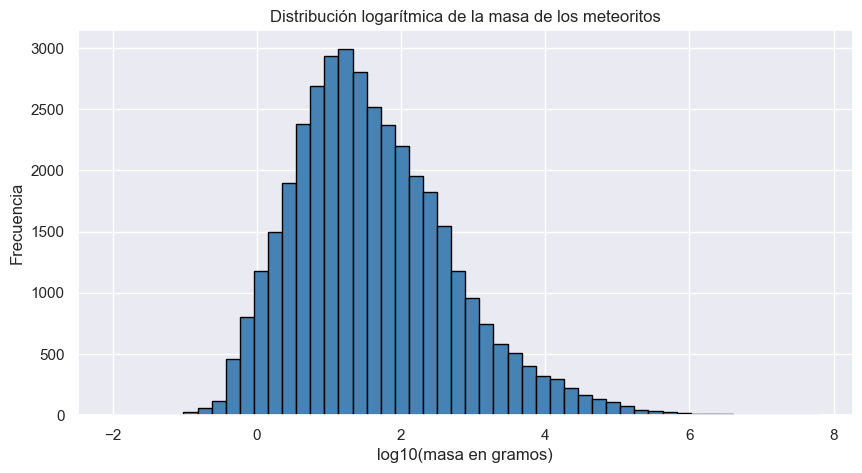

In [24]:
plt.figure(figsize=(10,5))
plt.hist(df_clean['mass_log10'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribución logarítmica de la masa de los meteoritos')
plt.xlabel('log10(masa en gramos)')
plt.ylabel('Frecuencia')
plt.show()


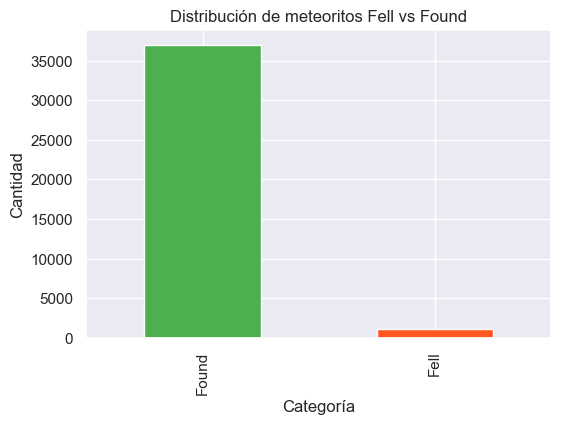

In [25]:
plt.figure(figsize=(6,4))
df_clean['fall'].value_counts().plot(kind='bar', color=['#4CAF50','#FF5722'])
plt.title('Distribución de meteoritos Fell vs Found')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()


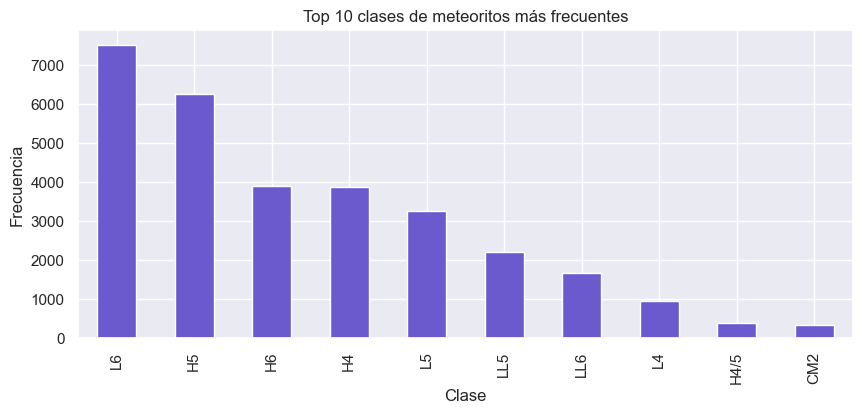

In [26]:
top_classes = df_clean['recclass'].value_counts().head(10)

plt.figure(figsize=(10,4))
top_classes.plot(kind='bar', color='slateblue')
plt.title('Top 10 clases de meteoritos más frecuentes')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


In [27]:
df_clean['decade'] = (df_clean['year'] // 10) * 10


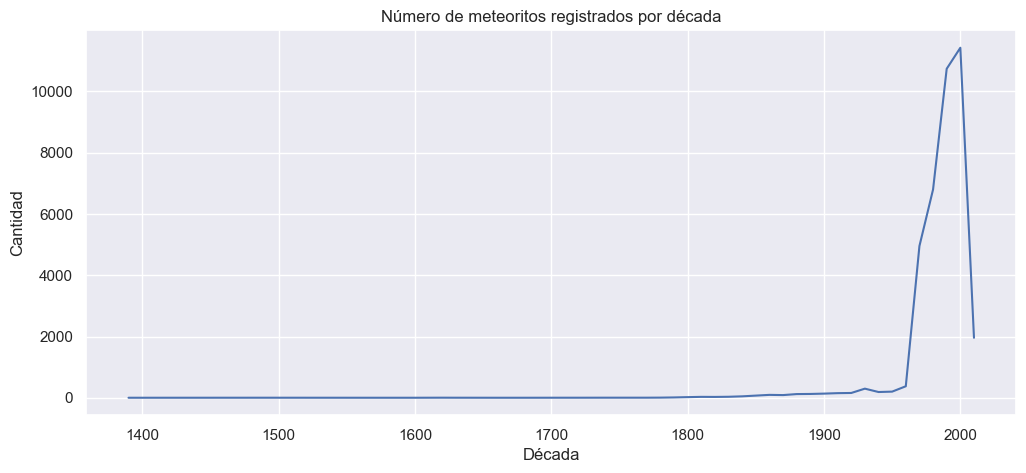

In [28]:
plt.figure(figsize=(12,5))
df_clean['decade'].value_counts().sort_index().plot(kind='line')
plt.title('Número de meteoritos registrados por década')
plt.xlabel('Década')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()


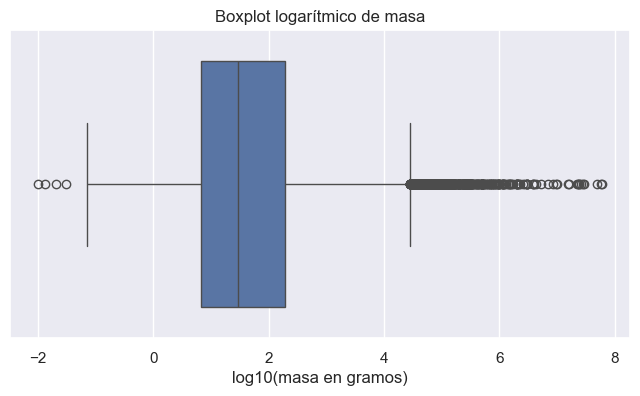

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['mass_log10'])
plt.title('Boxplot logarítmico de masa')
plt.xlabel('log10(masa en gramos)')
plt.show()


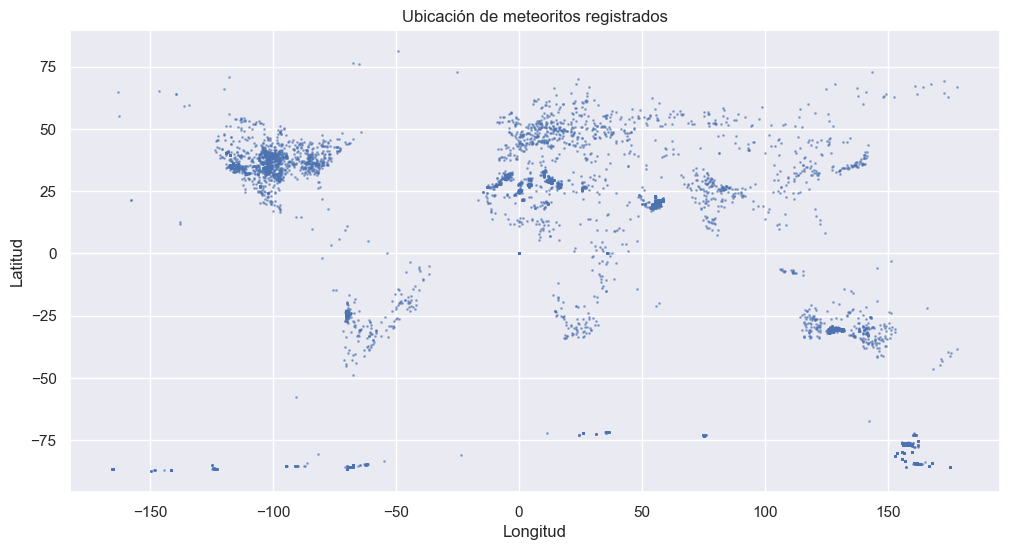

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(df_clean['reclong'], df_clean['reclat'], s=1, alpha=0.5)
plt.title('Ubicación de meteoritos registrados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
